In [29]:
import pandas as pd

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("fraudTest.csv")

In [32]:
print(df.head()) 

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [33]:
print(df.shape)

(555719, 23)


In [34]:
print(df.isnull())

        Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0            False                  False   False     False     False  False   
1            False                  False   False     False     False  False   
2            False                  False   False     False     False  False   
3            False                  False   False     False     False  False   
4            False                  False   False     False     False  False   
...            ...                    ...     ...       ...       ...    ...   
555714       False                  False   False     False     False  False   
555715       False                  False   False     False     False  False   
555716       False                  False   False     False     False  False   
555717       False                  False   False     False     False  False   
555718       False                  False   False     False     False  False   

        first   last  gender  street  .

In [35]:
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [36]:
print(df['is_fraud'].value_counts())

is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [37]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['weekday'] = df['trans_date_trans_time'].dt.weekday

In [38]:
drop_cols = ['trans_date_trans_time','dob','trans_num','merchant','first','last',
             'street','city','state','zip','lat','long','city_pop','job']
df = df.drop(columns=drop_cols, errors='ignore')

In [39]:
df.head()

,Unnamed: 0,cc_num,category,amt,gender,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,weekday
0,0,2291163933867244,personal_care,2.86,M,1371816865,33.986391,-81.200714,0,12,21,6,6
1,1,3573030041201292,personal_care,29.84,F,1371816873,39.450498,-109.960431,0,12,21,6,6
2,2,3598215285024754,health_fitness,41.28,F,1371816893,40.495810,-74.196111,0,12,21,6,6
3,3,3591919803438423,misc_pos,60.05,M,1371816915,28.812398,-80.883061,0,12,21,6,6
4,4,3526826139003047,travel,3.19,M,1371816917,44.959148,-85.884734,0,12,21,6,6


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
for col in ['gender','category']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (444575, 12) Test shape: (111144, 12)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
from imblearn.over_sampling import SMOTE
import numpy as np

In [48]:
print("Before SMOTE:", np.bincount(y_train))
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("After SMOTE:", np.bincount(y_train_res))

Before SMOTE: [442859   1716]
After SMOTE: [442859 442859]


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(n_estimators=200,max_depth=15,class_weight='balanced',random_state=42,n_jobs=-1)
rf.fit(X_train_res, y_train_res)
print("Model trained successfully!")

Model trained successfully!


In [52]:
from sklearn.metrics import (classification_report, confusion_matrix,roc_auc_score, precision_recall_curve, auc)

In [53]:
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:,1]

In [66]:
print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)


CONFUSION MATRIX:
[[110185    530]
 [    73    356]]


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

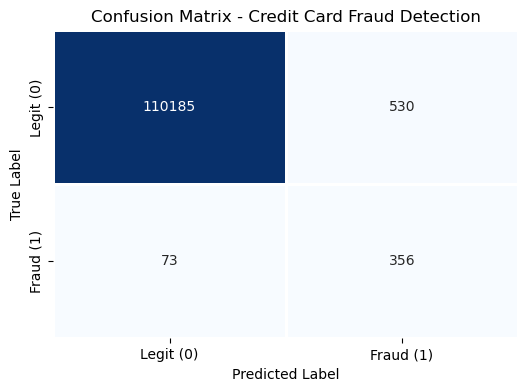

In [68]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, cbar=False)
plt.title("Confusion Matrix - Credit Card Fraud Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ['Legit (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Legit (0)', 'Fraud (1)'])
plt.show()

In [69]:
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=4))


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.9993    0.9952    0.9973    110715
           1     0.4018    0.8298    0.5414       429

    accuracy                         0.9946    111144
   macro avg     0.7006    0.9125    0.7694    111144
weighted avg     0.9970    0.9946    0.9955    111144



In [70]:
roc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc, 4))

ROC-AUC Score: 0.9918


In [71]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

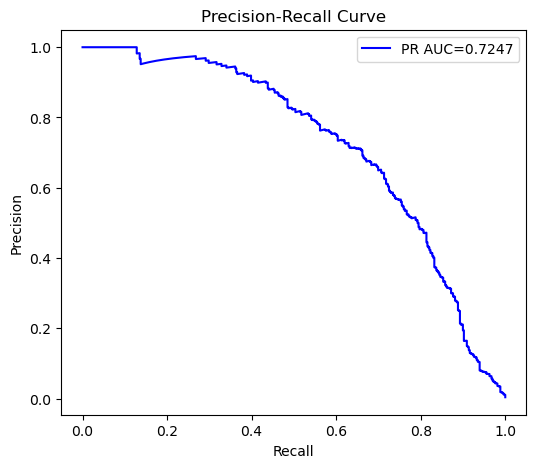

In [72]:
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='blue', label=f'PR AUC={pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
train_pred = rf.predict(X_train_res)
test_pred = rf.predict(X_test_scaled)

In [87]:
train_acc = accuracy_score(y_train_res, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [88]:
print("Train Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy:", round(test_acc * 100, 2), "%")

Train Accuracy: 99.59 %
Test Accuracy: 99.46 %


In [89]:
import joblib

In [90]:
joblib.dump(rf, "fraud_rf_model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("Model & scaler saved successfully!")

Model & scaler saved successfully!


In [91]:
sample_pred = rf.predict(X_test_scaled[:5])
print("\nSample Predictions:", sample_pred)


Sample Predictions: [0 0 0 0 0]
